# 🔍 Ridge Regression - Essential Guide

## 📋 **Table of Contents**
1. [What is Ridge Regression?](#what-is-ridge)
2. [Mathematical Foundation](#math-foundation)
3. [Why Use Ridge?](#why-ridge)
4. [Hyperparameter Selection](#hyperparameter)
5. [Implementation](#implementation)
6. [Comparison with OLS and Lasso](#comparison)

---

## 🎯 **What is Ridge Regression?** {#what-is-ridge}

Ridge Regression is a **regularized linear regression** technique that adds a penalty term to prevent overfitting.

**Key Idea**: Instead of just minimizing the sum of squared errors, we also penalize large coefficients.

---

## 🧮 **Mathematical Foundation** {#math-foundation}

### **Ordinary Least Squares (OLS)**
$$\hat{\boldsymbol{\beta}}_{OLS} = \arg\min_{\boldsymbol{\beta}} \|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|_2^2$$

### **Ridge Regression**
$$\hat{\boldsymbol{\beta}}_{Ridge} = \arg\min_{\boldsymbol{\beta}} \left\{ \|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|_2^2 + \lambda \|\boldsymbol{\beta}\|_2^2 \right\}$$

Where:
- $\lambda \geq 0$ is the **regularization parameter**
- $\|\boldsymbol{\beta}\|_2^2 = \sum_{j=1}^{p} \beta_j^2$ is the **L2 penalty**

### **Closed-Form Solution**
$$\boxed{\hat{\boldsymbol{\beta}}_{Ridge} = (\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I})^{-1}\mathbf{X}^T\mathbf{y}}$$

**Key Properties:**
- Always has a unique solution (even when $\mathbf{X}^T\mathbf{X}$ is singular)
- Coefficients are **shrunk** toward zero but never exactly zero
- Computationally stable

---

## 🤔 **Why Use Ridge?** {#why-ridge}

### **Problems with OLS**
1. **Overfitting**: High variance with many features
2. **Multicollinearity**: Unstable when features are correlated
3. **High-dimensional data**: Fails when $p \geq n$

### **Ridge Solutions**
1. **Reduces overfitting**: Penalty term controls model complexity
2. **Handles multicollinearity**: Keeps all correlated features but shrinks them
3. **Works with $p > n$**: Always invertible with $\lambda > 0$

### **Bias-Variance Tradeoff**
- **$\lambda = 0$**: High variance, low bias (same as OLS)
- **$\lambda$ increases**: Lower variance, higher bias
- **Optimal $\lambda$**: Minimizes total prediction error

---

## 🎛️ **Hyperparameter Selection** {#hyperparameter}

### **Cross-Validation Approach**

**k-Fold Cross-Validation:**
1. Try different $\lambda$ values: $[0.01, 0.1, 1, 10, 100, ...]$
2. For each $\lambda$:
   - Split data into k folds
   - Train on k-1 folds, validate on 1 fold
   - Repeat k times
3. Choose $\lambda$ with lowest average validation error

### **Grid Search Example**
```python
lambda_values = np.logspace(-3, 3, 50)  # 0.001 to 1000
best_lambda = None
best_score = float('inf')

for lam in lambda_values:
    cv_scores = cross_val_score(Ridge(alpha=lam), X, y, cv=5, 
                                scoring='neg_mean_squared_error')
    avg_score = -cv_scores.mean()
    if avg_score < best_score:
        best_score = avg_score
        best_lambda = lam
```

---

## 💻 **Implementation** {#implementation}

### **Using Scikit-learn**
```python
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Basic Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

# Ridge with CV (automatic lambda selection)
ridge_cv = RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5)
ridge_cv.fit(X_train, y_train)
print(f"Best alpha: {ridge_cv.alpha_}")
```

### **From Scratch**
```python
def ridge_regression(X, y, lambda_reg):
    """
    Simple Ridge regression implementation
    """
    n, p = X.shape
    I = np.eye(p)
    
    # Ridge solution
    XTX_lambda = X.T @ X + lambda_reg * I
    XTy = X.T @ y
    beta = np.linalg.solve(XTX_lambda, XTy)
    
    return beta

# Usage
beta_ridge = ridge_regression(X, y, lambda_reg=1.0)
```

### **Important: Feature Scaling**
```python
# Always standardize features for Ridge!
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Then apply Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_scaled, y)
```

**Why standardize?** Ridge penalizes all coefficients equally, so features with larger scales would be penalized less.

---

## ⚖️ **Comparison with OLS and Lasso** {#comparison}

| **Method** | **Penalty** | **Feature Selection** | **Multicollinearity** | **Interpretability** |
|------------|-------------|----------------------|----------------------|---------------------|
| **OLS** | None | No | Poor | High |
| **Ridge** | $\lambda\sum\beta_j^2$ | No (shrinks to ~0) | Good | Medium |
| **Lasso** | $\lambda\sum|\beta_j|$ | Yes (exact 0s) | Selects one from group | High |

### **When to Use Ridge?**
- **Many features** contribute to the prediction
- **Multicollinearity** is present
- **Prediction accuracy** is more important than interpretation
- You want to **keep all features** but reduce their impact

### **When NOT to Use Ridge?**
- You need **sparse models** (exact feature selection)
- **Few important features** among many irrelevant ones
- **Interpretability** is crucial

---

## 🔧 **Practical Tips**

### **Preprocessing Checklist**
1. ✅ **Standardize features** (mean=0, std=1)
2. ✅ **Handle missing values**
3. ✅ **Remove constant features**
4. ⚠️ **Don't regularize intercept** (use `fit_intercept=True`)

### **Hyperparameter Tuning**
```python
# Good lambda range to try
alphas = np.logspace(-4, 4, 50)  # 0.0001 to 10000

# Use RidgeCV for automatic selection
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train_scaled, y_train)
```

### **Model Evaluation**
```python
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = ridge.predict(X_test_scaled)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")
```

---

## 📊 **Quick Example**

```python
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Generate sample data
X, y = make_regression(n_samples=100, n_features=20, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compare OLS vs Ridge
ols = LinearRegression()
ridge = Ridge(alpha=1.0)

ols.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)

# Predictions
y_pred_ols = ols.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)

# Compare performance
print(f"OLS MSE: {mean_squared_error(y_test, y_pred_ols):.4f}")
print(f"Ridge MSE: {mean_squared_error(y_test, y_pred_ridge):.4f}")
```

---

## 🎯 **Key Takeaways**

1. **Ridge = OLS + L2 penalty** on coefficients
2. **Always standardize** features before applying Ridge
3. **Use cross-validation** to find optimal $\lambda$
4. **Good for prediction** when many features are relevant
5. **Handles multicollinearity** better than OLS
6. **No automatic feature selection** (use Lasso for that)

In [4]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [5]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

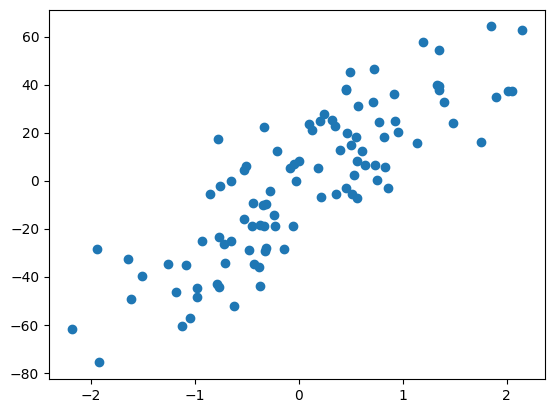

In [6]:
plt.scatter(X,y)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)


[27.82809103]
-2.29474455867698


In [9]:
from sklearn.linear_model import Ridge

In [10]:
rr = Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.126913003523573


In [11]:
rr1 = Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[12.93442104]
-1.4248441496033308


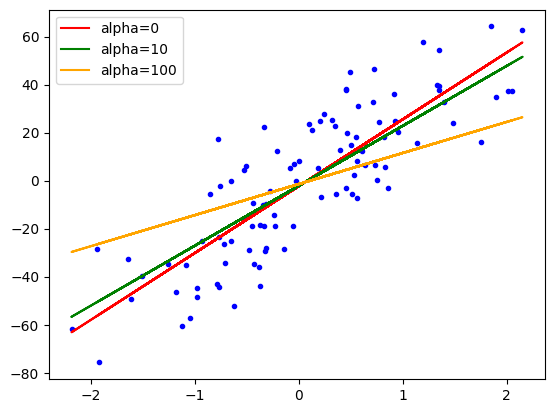

In [12]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,rr.predict(X),color='green',label='alpha=10')
plt.plot(X,rr1.predict(X),color='orange',label='alpha=100')
plt.legend()

In [16]:
class ridge:

    def __init__(self, alpha=0.1):
        self.alpha=alpha
        self.m=None
        self.b=None

    def fit(self,X_train, y_train):
        num = 0
        den = 0

        for i in range(X_train.shape[0]):
            num+=(y_train[i]-y_train.mean())*(X_train[i]-X_train.mean())
            den+=(X_train[i]-X_train.mean())*(X_train[i]-X_train.mean())

        den+=self.alpha
        self.m=num/den
        self.b=y_train.mean()-self.m*X_train.mean()

        print(self.m,self.b)

    def predict(self, X_test):
        pass

    

In [17]:
reg=ridge(alpha=100)

In [18]:
reg.fit(X,y)

[12.93442104] [-1.42484415]


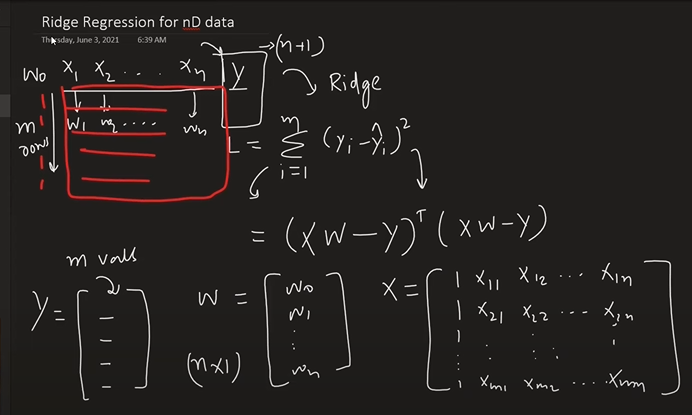

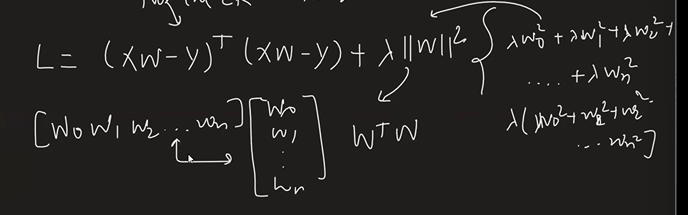
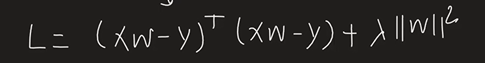

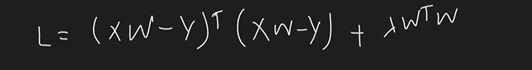

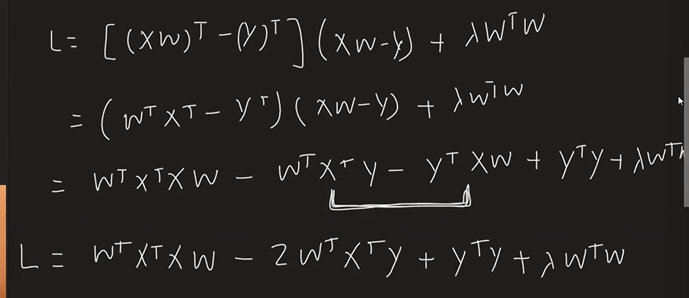

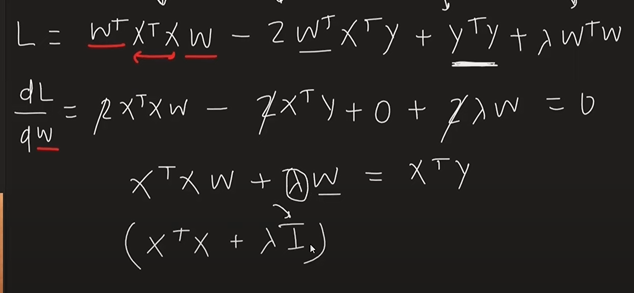

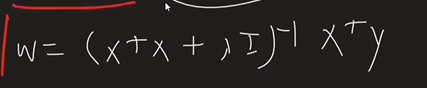

In [19]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [20]:
X,y = load_diabetes(return_X_y=True)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [23]:
from sklearn.linear_model import Ridge

In [24]:
reg = Ridge(alpha=0.1,solver='cholesky')

In [25]:
reg.fit(X_train,y_train)

Ridge(alpha=0.1, solver='cholesky')

In [26]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.46931288533098026

In [27]:
print(reg.coef_)
print(reg.intercept_)

[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808


In [30]:
class Ridge:
    
    def __init__(self,alpha=0.1):
        
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
        X_train = np.insert(X_train,0,1,axis=1)
        I = np.identity(X_train.shape[1])
        # implementation of scikit learn
        I[0][0] = 0
        result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
        self.intercept_ = result[0]
        self.coef_ = result[1:]
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [31]:
reg = Ridge()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

0.4693128853309806
[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602816
